<a href="https://colab.research.google.com/github/afrahhassan/afrahhassan/blob/main/Copy_of_assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---
# <div align="center"><font>  </font></div>
# <div align="center"><font> COSC 2793 Computational Machine Learning </font></div>
## <div align="center"> <font> Assignment 2: Machine Learning Project </font></div>
## <div align="center"> <font> S3930776 Afrah Hassan A Alshaikh Ali & S3569266 Chang Su </font></div>
---

In [27]:
#Import Libraries
import os
import csv
import zipfile
import pandas as pd
import cv2
import numpy as np
import PIL
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from PIL import Image

Workflow
We need to follow the below 4 steps to build our traffic sign classification model:

Dataset exploration
CNN model building
Model training and validation
Model testing
https://www.analyticsvidhya.com/blog/2021/12/traffic-signs-recognition-using-cnn-and-keras-in-python/


# **1. Load and Preprocess the Data**

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
os.listdir('/content/drive/MyDrive/Assignment2')

['assignment2_PG.pdf',
 'COSC2673_2793_A2_EOI_.docx',
 'assignment2.ipynb',
 'trafficsigns_dataset.zip',
 'trafficsigns_dataset',
 'merged_data.csv',
 'type.csv',
 'shape.csv',
 'combined_data.csv']

In [30]:
!cp -r "/content/drive/MyDrive/Assignment2" .

# **Reading Data and preprocessing**

In [36]:

extract_to_path = '/content/drive/MyDrive/Assignment2'
output_csv = '/content/drive/My Drive/Assignment2/combined_data.csv'

data_list = []

for root, dirs, files in os.walk(extract_to_path):
    for file in files:
        if file.endswith(('.png', '.jpg', '.jpeg')):
            full_path = os.path.join(root, file)
            class_name = os.path.basename(os.path.dirname(root))
            img = Image.open(full_path).convert('L')
            img_array = np.array(img).flatten()
            data_list.append({'image_path': full_path, 'class': class_name, 'image_array': img_array.tolist()})
data = pd.DataFrame(data_list)

encoder = LabelEncoder()

data['encoded_class'] = encoder.fit_transform(data['class'])

class_labels_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print("Mapping of classes to encoded labels:", class_labels_mapping)

data.to_csv(output_csv, index=False)
print(f"CSV file has been created successfully with {len(data)} entries at {output_csv}")


Mapping of classes to encoded labels: {'diamond': 0, 'hex': 1, 'round': 2, 'square': 3, 'triangle': 4}
CSV file has been created successfully with 3699 entries at /content/drive/My Drive/Assignment2/combined_data.csv


# **Data Exploration**

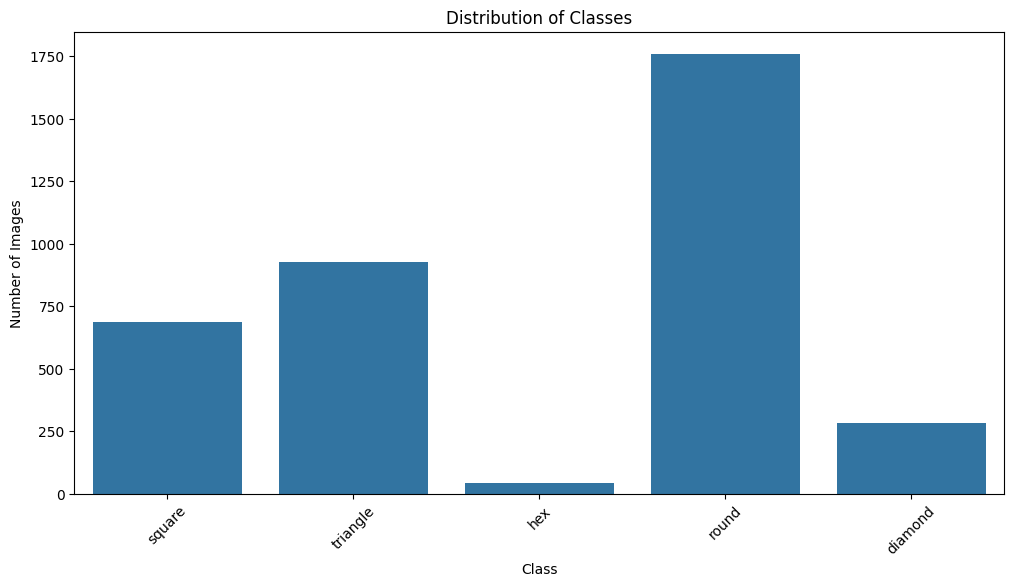

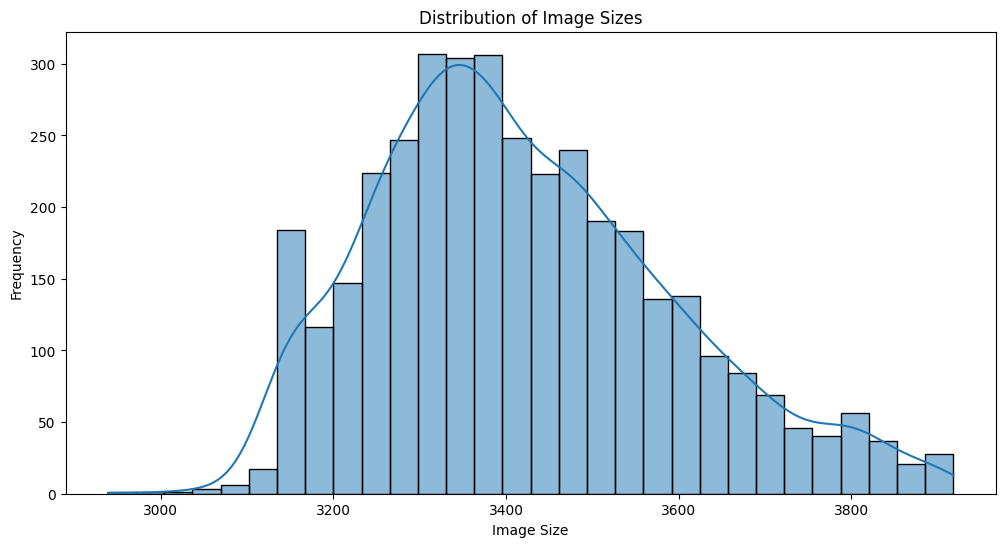

In [38]:
data = pd.read_csv('/content/drive/My Drive/Assignment2/combined_data.csv')

# Convert the flat list of image arrays into a numpy array to calculate their sizes
data['image_size'] = data['image_array'].apply(lambda x: len(x))

# Plot the distribution of classes
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='class')
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show()

# Plot the distribution of image sizes
plt.figure(figsize=(12, 6))
sns.histplot(data['image_size'], bins=30, kde=True)
plt.title('Distribution of Image Sizes')
plt.xlabel('Image Size')
plt.ylabel('Frequency')
plt.show()


# **Data Splitting**

In [41]:
from sklearn.model_selection import train_test_split

data = pd.read_csv('/content/drive/My Drive/Assignment2/combined_data.csv')

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.25, random_state=42)

print("Train data : {}, Val Data: {}, Test Data: {}".format(train_data.shape[0], val_data.shape[0], test_data.shape[0]))

Train data : 2219, Val Data: 740, Test Data: 740


# **EDA**
Model development

3. Choose a Model

4. Train the Model

5. Evaluate the Model